## Motif using logos in python using matplotlib

This is a proof of concept for plotting motif logos using matplotlib.
The coordinates for bases were picked of from [seqLogo](http://bioconductor.org/packages/release/bioc/html/seqLogo.html) package.

`seqLogo` is LGPL(v2.1) licensed and hence so is this notebook.

See [LICENCE](LICENSE)

In [1]:
%matplotlib notebook
from __future__ import division
from Bio import motifs
import seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

colors_scheme = {'G': 'orange', 'T': 'green', 'C': 'blue', 'A': 'red'}


In [2]:
with open("../plot_playground/meme_out/meme.txt") as handle:
    m = motifs.parse(handle, "meme")

In [3]:
def plotA(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot A"""
    x = np.array([ 0.  ,  0.4 ,  0.6 ,  1.  ,  0.8 ,  0.68,  0.32,  0.2 ,  0.])
    y = np.array([ 0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.3 ,  0.3 ,  0.  ,  0.])
    x = xstart + xscale*x
    y = ystart + yscale*y
    triy =  np.array([0.4 ,   0.4 , 0.75, 0.4])
    trix =  np.array([0.36,   0.64, 0.5, 0.36])

    trix = xstart + xscale*trix
    triy = ystart + yscale*triy
    
    return x, y, trix, triy

def plotT(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot T"""
    x = np.array([ 0. ,  1. ,  1. ,  0.6,  0.6,  0.4,  0.4,  0. ])
    y = np.array([ 1. ,  1. ,  0.9,  0.9,  0. ,  0. ,  0.9,  0.9])
    x = xstart + xscale*x
    y = ystart + yscale*y
    return x,y

def plotG(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot G"""
    angle1 = np.linspace(0.3+np.pi/2,np.pi,num=100)
    angle2 = np.linspace(np.pi,1.5*np.pi, num=100)
  
    xl1 = 0.5 + 0.5*np.sin(angle1)
    yl1 =0.5 + 0.5*np.cos(angle1)
    xl2 =0.5 + 0.5*np.sin(angle2)
    yl2 =0.5 + 0.5*np.cos(angle2)

    xl = np.concatenate((xl1, xl2))
    yl = np.concatenate((yl1, yl2))

    x = np.concatenate((xl, xl[::-1]))
    y = np.concatenate((yl, 1-yl[::-1]))

    xi1 = 0.5 + 0.35*np.sin(angle1)
    yi1 = 0.5 + 0.35*np.cos(angle1)
    xi1 = xi1[np.where(yi1<=np.max(yl1))]
    yi1 = yi1[np.where(yi1<=np.max(yl1))]
    yi1[0] = np.max(yl1)

    xi2 = 0.5 + 0.35*np.sin(angle2)
    yi2 = 0.5 + 0.35*np.cos(angle2)

    xi = np.concatenate((xi1,xi2))
    yi = np.concatenate((yi1,yi2))

    x1 = np.concatenate((xi,xi[::-1]))
    y1 = np.concatenate((yi,1-yi[::-1]))

    x = np.concatenate((x,x1[::-1]))
    y = np.concatenate((y, y1[::-1]))
    
    r1 = np.max(xl1)

    h1 = 0.4
    xadd = np.array([r1,0.5,0.5,r1-0.2,r1-0.2,r1,r1])
    yadd = np.array([h1,h1,h1-0.1,h1-0.1,0,0,h1])
    
    x = np.concatenate((x[::-1],xadd))
    y = np.concatenate((y[::-1],yadd))

    x = xstart + xscale*x
    y = ystart + yscale*y
    
    return x,y

def plotC(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot C"""
    
    angle1 = np.linspace(0.3+np.pi/2,np.pi,num=100)
    angle2 = np.linspace(np.pi,1.5*np.pi, num=100)
  
    xl1 = 0.5 + 0.5*np.sin(angle1)
    yl1 = 0.5 + 0.5*np.cos(angle1)
    xl2 = 0.5 + 0.5*np.sin(angle2)
    yl2 = 0.5 + 0.5*np.cos(angle2)

    xl = np.concatenate((xl1, xl2))
    yl = np.concatenate((yl1, yl2))

    x = np.concatenate((xl, xl[::-1]))
    y = np.concatenate((yl, 1-yl[::-1]))

    xi1 = 0.5 + 0.35*np.sin(angle1)
    yi1 = 0.5 + 0.35*np.cos(angle1)
    xi1 = xi1[np.where(yi1<=np.max(yl1))]
    yi1 = yi1[np.where(yi1<=np.max(yl1))]
    yi1[0] = np.max(yl1)

    xi2 = 0.5 + 0.35*np.sin(angle2)
    yi2 = 0.5 + 0.35*np.cos(angle2)

    xi = np.concatenate((xi1,xi2))
    yi = np.concatenate((yi1,yi2))

    x1 = np.concatenate((xi,xi[::-1]))
    y1 = np.concatenate((yi,1-yi[::-1]))

    x = np.concatenate((x,x1[::-1]))
    y = np.concatenate((y, y1[::-1]))
    x = xstart + xscale*x
    y = ystart + yscale*y
    return x,y

In [4]:
def approximate_error(motif):
    pwm = motif.pwm
    bases = pwm.keys()
    n = sum(motif.counts[bases[0]])
    #info_matrix = calc_info_matrix(motif)
    approx_error = (len(bases)-1)/(2 * np.log(2) * n)
    return approx_error
    #corrected_matrix = [2-approx_correction+sum([pwm[b][l]*np.nan_to_num(np.log2(pwm[b][l])) for b in bases]) for l in range(0, len(motif))]
    #return corrected_matrix


def exact_error(motif):
    ## Super Slow. O(n^3)
    pwm = motif.pwm
    bases = pwm.keys()
    na = sum(motif.counts['A'])
    n = na
    nc = 0
    ng = 0
    nt = 0
    done = False
    exact_error = 0
    while not done:
        print (na,nc,ng,nt)
        exact_error += sum([-p*np.log2(p) for p in [na/n, nc/n, ng/n, nt/n]])
        if nt<=0:
            ## iterate inner loop            
            if ng > 0:
                ## g => t
                ng = ng - 1
                nt = nt + 1
            elif nc > 0:
                ## c -> g 
                nc = nc - 1;
                ng = ng + 1;
            else:
                ## a->c
                na = na - 1
                nc = nc + 1
        else:
            if ng > 0:
                ## g => t
                ng = ng - 1 
                nt = nt + 1
            elif nc>0:
                ## c => g; all t -> g
                nc = nc - 1
                ng = nt + 1
                nt = 0
            elif na>0:
                ## a => c; all g,t -> c
                nc = nt + 1
                na = na - 1
                nt = 0
            else:
                done = True
    return exact_correction

def calc_info_matrix(motif, correction_type='approx'):
    pwm = motif.pwm
    bases = pwm.keys()
    if correction_type=='approx':
        error = approximate_error(motif)
    else:
        error = exact_error(motif)
    info_matrix = [2-error+sum([pwm[b][l]*np.nan_to_num(np.log2(pwm[b][l])) for b in bases]) for l in range(0, len(motif))]
    return info_matrix

def calc_relative_information(motif, correction_type='approx'):
    pwm = motif.pwm
    bases = pwm.keys()
    if correction_type=='approx':
        info_matrix = calc_info_matrix(motif)
    else:
        info_matrix = calc_info_matrix(motif, 'exact')
    relative_info = {base: [prob*info for prob,info in zip(pwm[base], info_matrix)]  for base in bases}
    return relative_info

<IPython.core.display.Javascript object>


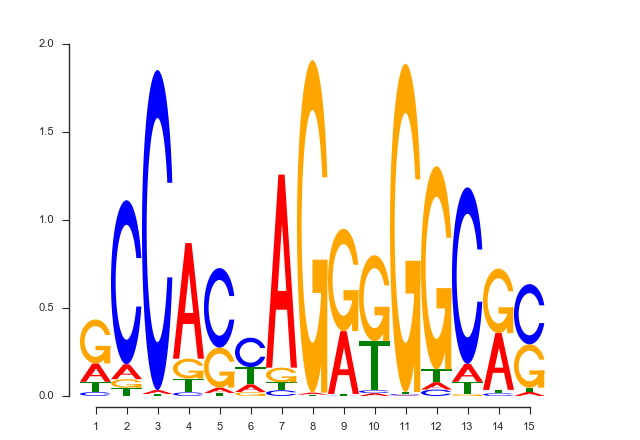

In [6]:
motif = m[0]
rel_info = calc_relative_information(motif)
bases = ['A', 'T', 'G', 'C']
fig = plt.figure()
ax = fig.add_subplot(111)
patches = []
white_spots = []
colors = []
xshift = 0
for i in range(0, len(motif)):
    scores = [(b,rel_info[b][i]) for b in bases]
    scores.sort(key=lambda t: t[1])
    yshift = 0
    for base, score in scores:
        if base=='A':
            X, Y, triX, triY = plotA(xstart=xshift, ystart=yshift, yscale=score) 
            white_spots.append((triX, triY))
            colors.append(colors_scheme['A'])
        elif base=='C':
            X, Y = plotC(xstart=xshift, ystart=yshift, yscale=score) 
            colors.append(colors_scheme['C'])
        elif base=='T':
            X, Y = plotT(xstart=xshift, ystart=yshift, yscale=score) 
            colors.append(colors_scheme['T'])
        elif base=='G':
            X, Y = plotG(xstart=xshift, ystart=yshift, yscale=score) 
            colors.append(colors_scheme['G'])
        yshift +=score
        plot = mpatches.Polygon(zip(X,Y), closed=True, fill=None)
        patches.append(plot)
    xshift+=1
collection = PatchCollection(patches, edgecolors='none', facecolors=colors)
ax.add_collection(collection)
for triX, triY in white_spots:
    ax.fill_between(triX, triY, color="white", linewidth=0.0)

ax.set_xticks(np.arange(0.5,len(motif)+0.5,1))
ax.set_xticklabels(range(1, len(motif)+1))

seaborn.despine(ax=ax, offset=10, trim=True)

plt.show()

### MEME Logo:

![img](./meme_out/logo1.png)